# Abstract movie data from PostgreSQL
- look into each file and prework them for clustering.

### Import all needed dictionaries. 

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from decouple import config
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### Connect to db and retrive data.

In [2]:
HOST = 'localhost'
PORT = '5432'
DATABASE = 'postgres'
PASSWORD = config('PASSWORD')
USER = config('USER')
conn_string_mac = f'postgres://{HOST}:{PORT}/{DATABASE}'
engine = sqlalchemy.create_engine(conn_string_mac, echo=False)

In [3]:
def retrive_data(query):
    '''this function will connect to db and retrive data base on given queries'''
    result = engine.execute(query)
    data = result.fetchall()
    return data

In [4]:
movies_list = retrive_data(query='''
SELECT movieid, title, genres FROM movie ORDER BY movieid;
''')

In [5]:
ratings_list =  retrive_data(query='''
SELECT userid, movieid, rating FROM ratings ORDER BY movieid;
''')

In [37]:
def list2df(_list,cols,dtype):
    '''original result from db is list, this function change list to df'''
    df = pd.DataFrame(_list, columns = cols,dtype = dtype)
    return df

In [43]:
movies = list2df(_list=movies_list, cols = ['movieid','title','genres'], dtype=int)
ratings = list2df(_list=ratings_list, cols = ['userid','movieid','rating'],dtype=int)

In [45]:
'''
clean movies file
'''
movies = movies.join(movies['genres'].str.get_dummies('|'))
movies.drop(['genres','(no genres listed)'], axis=1, inplace=True)

In [46]:
'''
reconfirm that data are correctly retrived
'''
ratings.head(5)

,userid,movieid,rating
0,157475,1,2.0
1,156861,1,3.0
2,157458,1,3.0
3,157124,1,3.0
4,157453,1,4.0


In [47]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   userid   int64 
 1   movieid  int64 
 2   rating   object
dtypes: int64(2), object(1)
memory usage: 572.2+ MB


In [48]:
movies.head(5)

,movieid,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieid      62423 non-null  int64 
 1   title        62423 non-null  object
 2   Action       62423 non-null  int64 
 3   Adventure    62423 non-null  int64 
 4   Animation    62423 non-null  int64 
 5   Children     62423 non-null  int64 
 6   Comedy       62423 non-null  int64 
 7   Crime        62423 non-null  int64 
 8   Documentary  62423 non-null  int64 
 9   Drama        62423 non-null  int64 
 10  Fantasy      62423 non-null  int64 
 11  Film-Noir    62423 non-null  int64 
 12  Horror       62423 non-null  int64 
 13  IMAX         62423 non-null  int64 
 14  Musical      62423 non-null  int64 
 15  Mystery      62423 non-null  int64 
 16  Romance      62423 non-null  int64 
 17  Sci-Fi       62423 non-null  int64 
 18  Thriller     62423 non-null  int64 
 19  War          62423 non-nu

<AxesSubplot:>

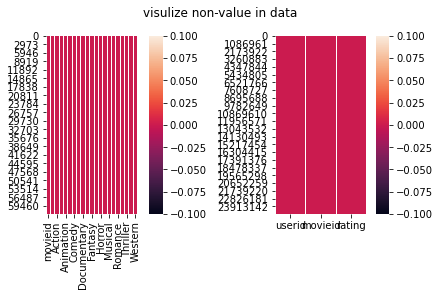

In [13]:
'''
to visulize if there is non value,and how many. 
df.info() df.description() works as well
results shows no non-value
'''
fig_heatmap, axes = plt.subplots(1, 2, sharex=False, sharey=False, constrained_layout=True)
fig_heatmap.suptitle('visulize non-value in data')
sns.heatmap(movies.isnull(), ax = axes[0])
sns.heatmap(ratings.isnull(),ax = axes[1])

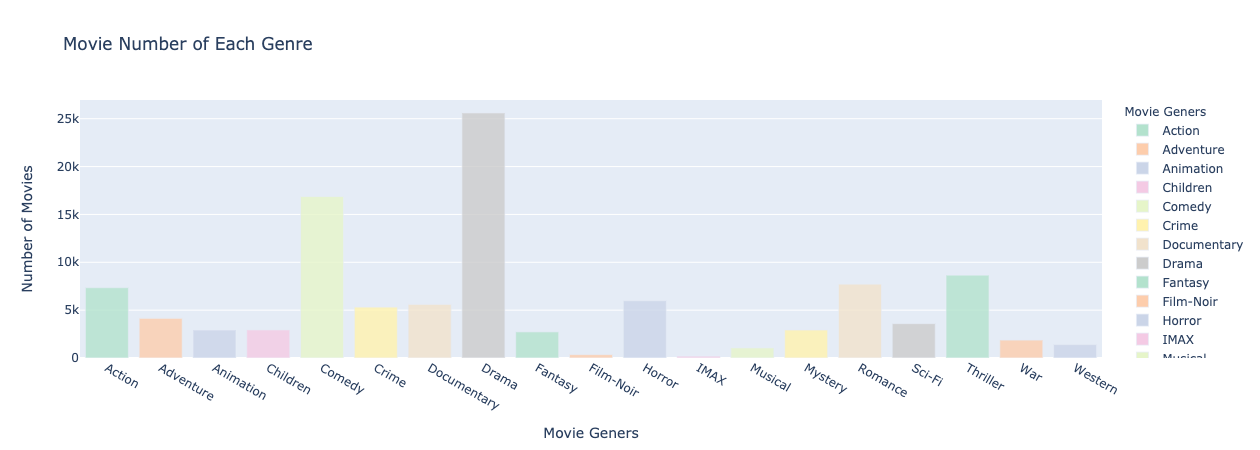

In [50]:
'''how many movies lays in each gener?'''
fig_generes_movies = px.bar(
    movies.drop(['movieid', 'title'], axis=1).sum(axis=0, skipna=True), 
    color=movies.columns[2:], 
    title='Movie Number of Each Genre', 
    opacity=0.8,
    labels=dict(index = 'Movie Geners', value = 'Number of Movies', color = 'Movie Geners'),
    color_discrete_sequence=px.colors.qualitative.Pastel2
)
fig_generes_movies.show()

In [54]:
'''
pickle dataframe for late use
or saving them as csv
'''
#movies.to_pickle("./data/movies.pkl")
#ratings.to_pickle('./data/ratings.pkl')
movies.to_csv('big_data/movie.csv')
ratings.to_csv('big_data/rating.csv')

### ---------------------------------------------------end of retriving data from db---------------------------------------------------------

In [18]:
df=pd.read_csv('data/ratings.csv')

In [ ]:
query = 
'''
ALTER TABLE ratings
ADD COLUMN data_type constraint
'''